<a href="https://colab.research.google.com/github/LionOfLaakea/UT-Austin.GL.Gracey/blob/main/JGV2_ML_PLC_Full_Code_SolutionNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 scikit-learn==1.6.1 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

## Loading the dataset

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/sample_data/Loan_Modelling.csv')

# Display the first 5 rows of the dataframe
display(df.head())

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


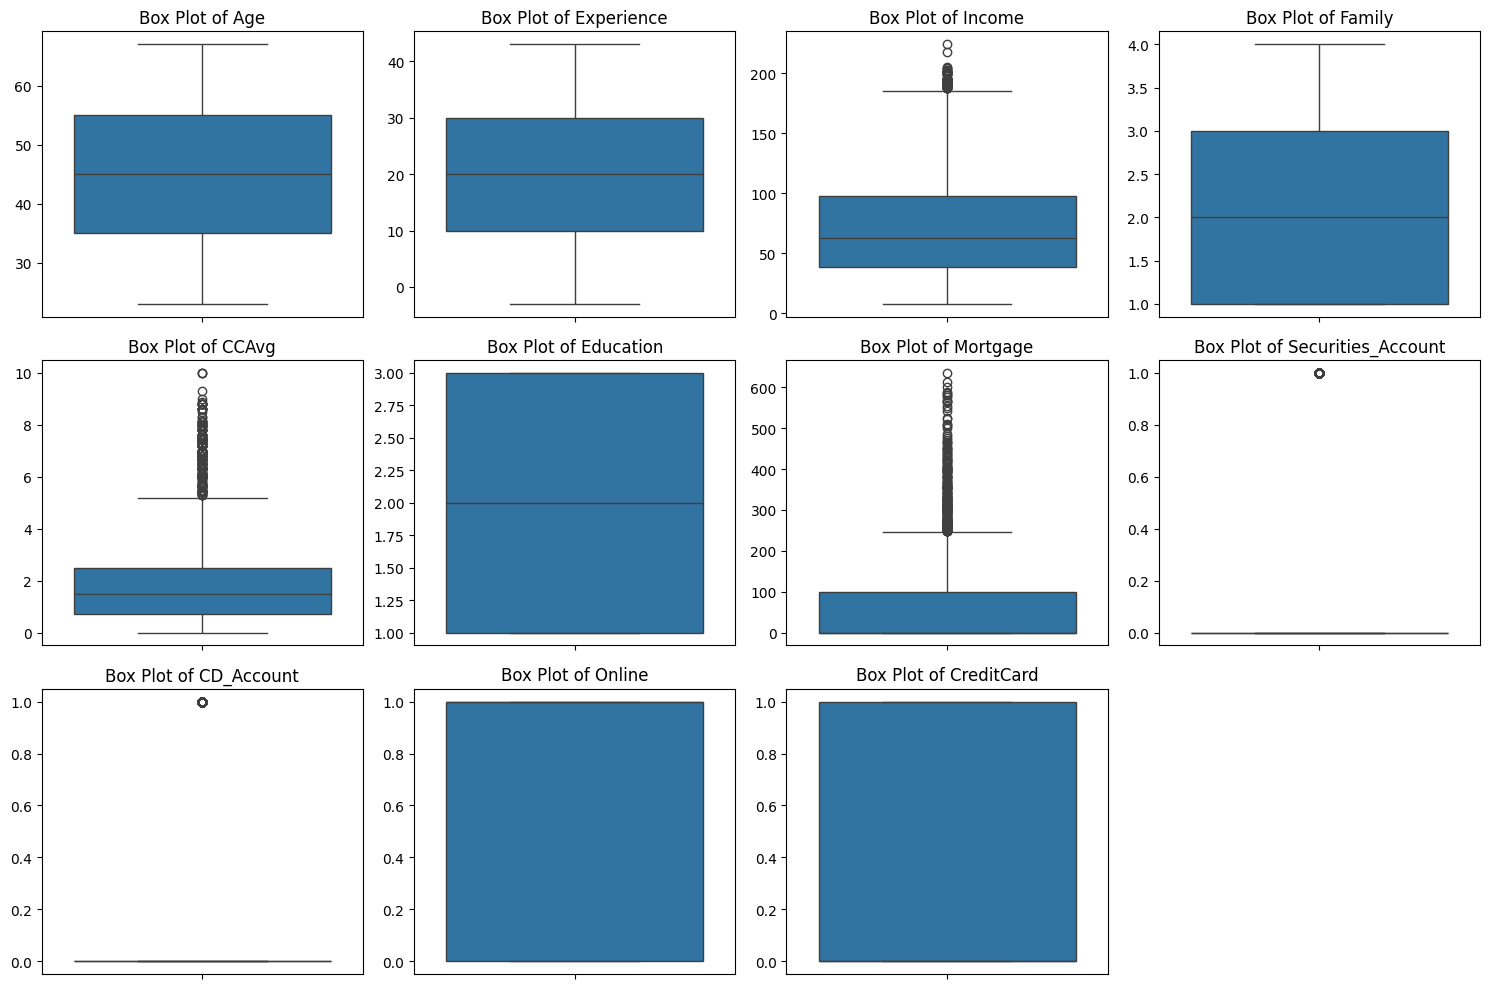

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns from X_train
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create box plots for each numerical column to check for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(y=X_train[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('') # Clear y-label for cleaner plot
plt.tight_layout()
plt.show()

This code generates box plots for all numerical features in the training data (`X_train`). Outliers will appear as individual points beyond the 'whiskers' of the box plots. We will analyze these plots to decide if any outlier treatment is necessary.

In [9]:
print('Missing values per column:')
print(df.isnull().sum())

Missing values per column:
ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


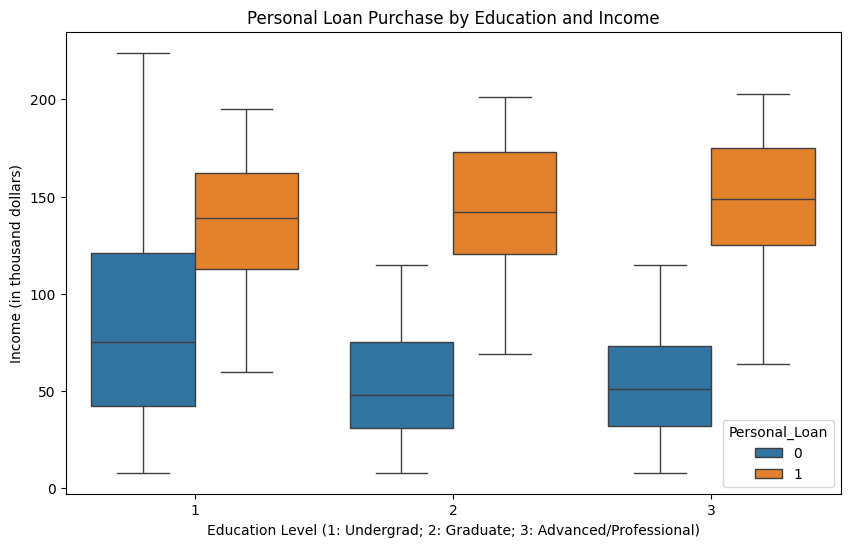


Personal Loan Acceptance Rate by Education Level:
Personal_Loan         0         1
Education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576


In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Income', hue='Personal_Loan', data=df)
plt.title('Personal Loan Purchase by Education and Income')
plt.xlabel('Education Level (1: Undergrad; 2: Graduate; 3: Advanced/Professional)')
plt.ylabel('Income (in thousand dollars)')
plt.show()

loan_by_education = df.groupby('Education')['Personal_Loan'].value_counts(normalize=True).unstack()
print('\nPersonal Loan Acceptance Rate by Education Level:')
print(loan_by_education)

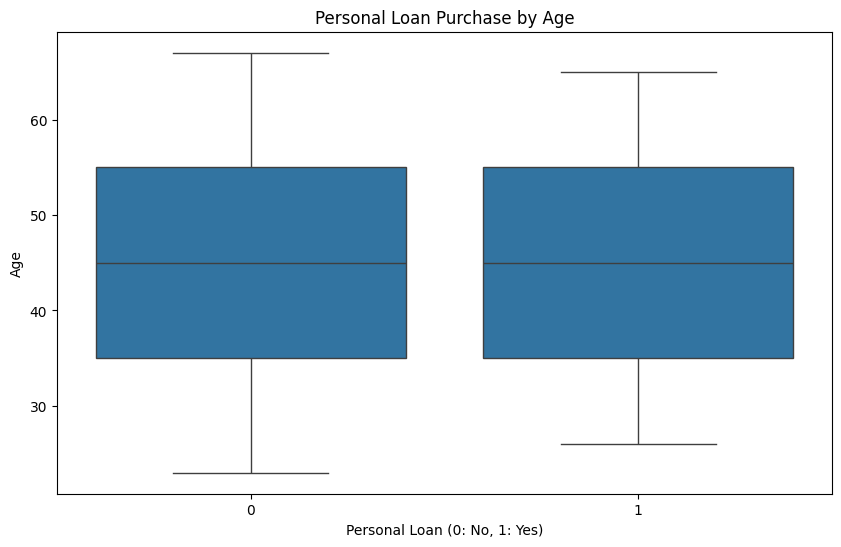

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal_Loan', y='Age', data=df)
plt.title('Personal Loan Purchase by Age')
plt.xlabel('Personal Loan (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

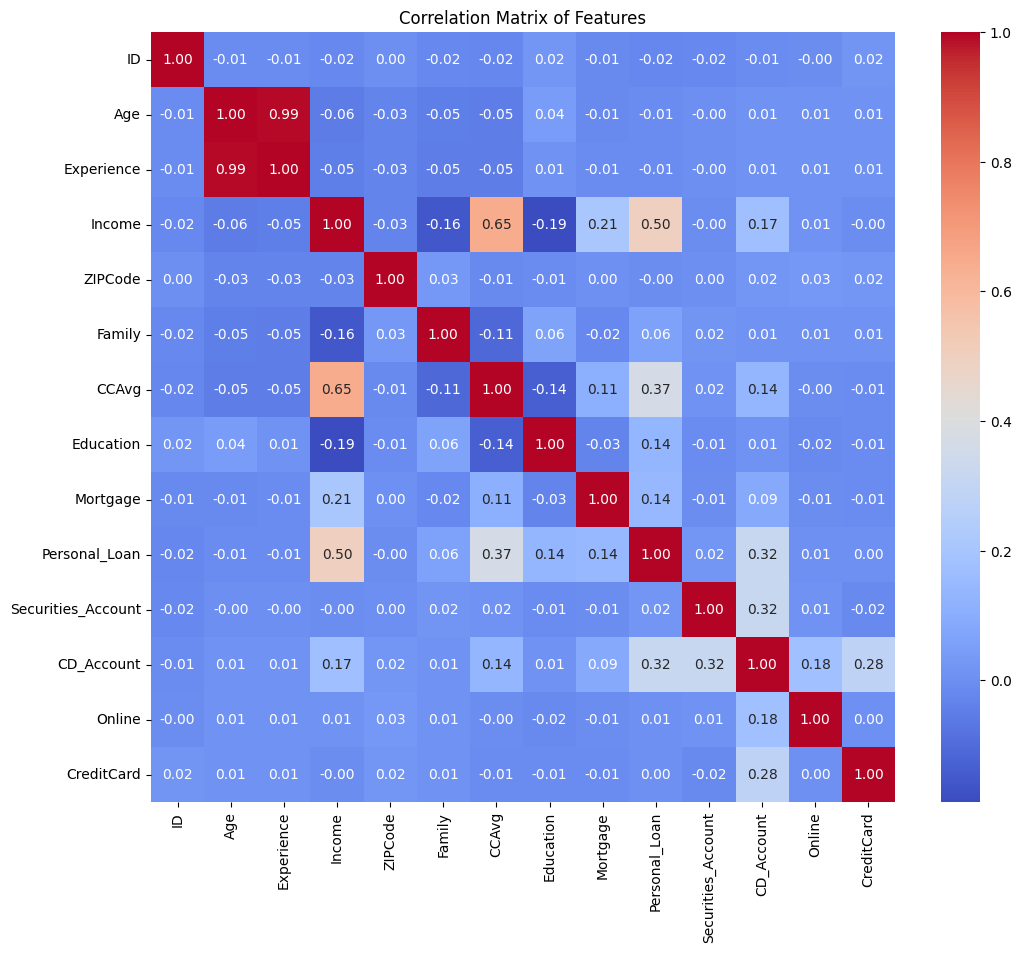


Correlation with Personal_Loan:
Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIPCode              -0.002974
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal_Loan, dtype: float64


In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

# Display correlation with Personal_Loan specifically
correlation_with_loan = df.corr(numeric_only=True)['Personal_Loan'].sort_values(ascending=False)
print('\nCorrelation with Personal_Loan:')
print(correlation_with_loan)

In [5]:
credit_card_customers = df['CreditCard'].value_counts()
print(credit_card_customers)

num_customers_with_credit_card = credit_card_customers.get(1, 0)
print(f"\nNumber of customers with credit cards: {num_customers_with_credit_card}")

CreditCard
0    3530
1    1470
Name: count, dtype: int64

Number of customers with credit cards: 1470


## Data Overview

* Observations
* Sanity checks

In [3]:
df.info()
print('\n')
df.describe()
print('\n')
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB






(5000, 14)

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

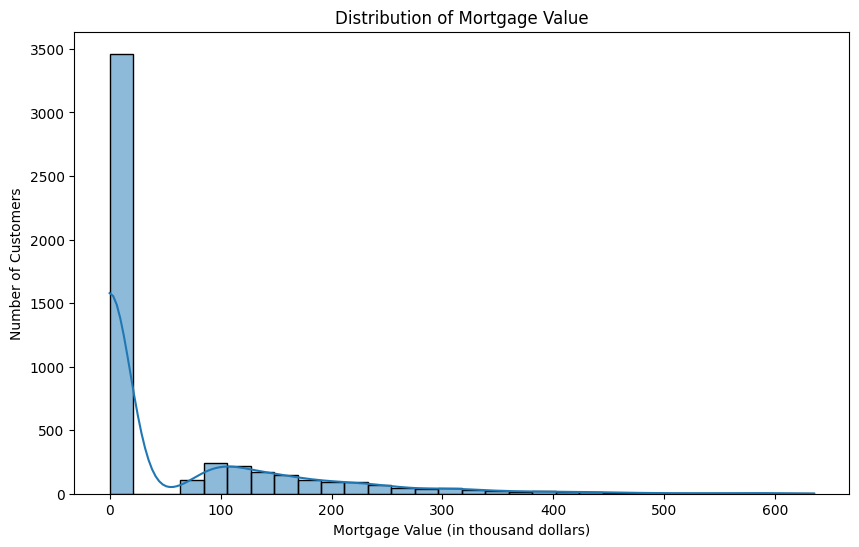

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Mortgage
plt.figure(figsize=(10, 6))
sns.histplot(df['Mortgage'], bins=30, kde=True)
plt.title('Distribution of Mortgage Value')
plt.xlabel('Mortgage Value (in thousand dollars)')
plt.ylabel('Number of Customers')
plt.show()

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [10]:
from sklearn.model_selection import train_test_split

# Drop irrelevant features 'ID' and 'ZIPCode'
df_processed = df.drop(['ID', 'ZIPCode'], axis=1)

# Separate features (X) and target (y)
X = df_processed.drop('Personal_Loan', axis=1)
y = df_processed['Personal_Loan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3750, 11)
X_test shape: (1250, 11)
y_train shape: (3750,)
y_test shape: (1250,)


## Model Building

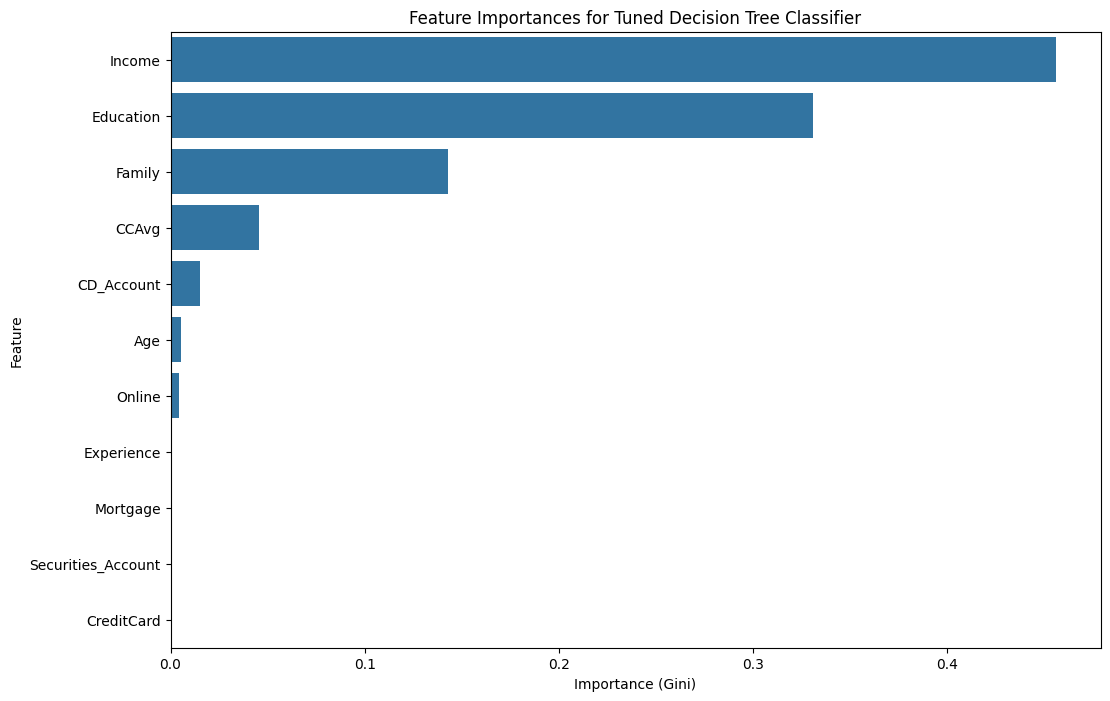

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances from the tuned Decision Tree model
feature_importances = dtc_tuned.feature_importances_

# Get feature names from X_train (since 'ID' and 'ZIPCode' were dropped)
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances for Tuned Decision Tree Classifier')
plt.xlabel('Importance (Gini)')
plt.ylabel('Feature')
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Maximum depth of the tree
    'min_samples_leaf': [1, 5, 10, 20],  # Minimum number of samples required to be at a leaf node
    'min_samples_split': [2, 5, 10, 20]  # Minimum number of samples required to split an internal node
}

# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
# We'll use 'f1' scoring for the positive class (1) which aligns with our evaluation criteria
grid_search_dt = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print(f"Best Hyperparameters for Decision Tree: {best_params_dt}")
print(f"Best F1-score (on cross-validation) for Decision Tree: {best_score_dt:.4f}")

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Hyperparameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best F1-score (on cross-validation) for Decision Tree: 0.9064


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier with best hyperparameters
# Using the 'best_params_dt' obtained from GridSearchCV
dtc_tuned = DecisionTreeClassifier(random_state=42, **best_params_dt)

# Train the tuned model
dtc_tuned.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt_tuned = dtc_tuned.predict(X_test)

# Evaluate the tuned model
print('Tuned Decision Tree Classifier Performance:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt_tuned):.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_dt_tuned))

Tuned Decision Tree Classifier Performance:
Accuracy: 0.9816

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.91      0.89      0.90       120

    accuracy                           0.98      1250
   macro avg       0.95      0.94      0.95      1250
weighted avg       0.98      0.98      0.98      1250



### Model Evaluation Criterion

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search (same as before)
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20]
}

# Initialize the Decision Tree Classifier
dtc_smote = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV, now fitting on SMOTE-resampled data
grid_search_dt_smote = GridSearchCV(estimator=dtc_smote, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the SMOTE-resampled training data
grid_search_dt_smote.fit(X_train_smote, y_train_smote)

# Get the best parameters and best score
best_params_dt_smote = grid_search_dt_smote.best_params_
best_score_dt_smote = grid_search_dt_smote.best_score_

print(f"Best Hyperparameters for Decision Tree (after SMOTE): {best_params_dt_smote}")
print(f"Best F1-score (on cross-validation, after SMOTE): {best_score_dt_smote:.4f}")

# Train the tuned model with SMOTE data
dtc_tuned_smote = DecisionTreeClassifier(random_state=42, **best_params_dt_smote)
dtc_tuned_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the original (unmodified) test set
y_pred_dt_tuned_smote = dtc_tuned_smote.predict(X_test)

# Evaluate the tuned model with SMOTE on the test set
print('\nTuned Decision Tree Classifier Performance (after SMOTE):')
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt_tuned_smote):.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_dt_tuned_smote))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Hyperparameters for Decision Tree (after SMOTE): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1-score (on cross-validation, after SMOTE): 0.9662

Tuned Decision Tree Classifier Performance (after SMOTE):
Accuracy: 0.9640

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1130
           1       0.74      0.96      0.84       120

    accuracy                           0.96      1250
   macro avg       0.87      0.96      0.91      1250
weighted avg       0.97      0.96      0.97      1250



In [16]:
# Install imbalanced-learn if not already installed
!pip install imbalanced-learn -q --user

In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print(f"Original class distribution in y_train: {Counter(y_train)}")

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"New class distribution after SMOTE in y_train: {Counter(y_train_smote)}")

Original class distribution in y_train: Counter({0: 3390, 1: 360})
New class distribution after SMOTE in y_train: Counter({1: 3390, 0: 3390})


### Model Building

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search (same as before)
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20]
}

# Initialize the Decision Tree Classifier
dtc_smote = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV, now fitting on SMOTE-resampled data
grid_search_dt_smote = GridSearchCV(estimator=dtc_smote, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the SMOTE-resampled training data
grid_search_dt_smote.fit(X_train_smote, y_train_smote)

# Get the best parameters and best score
best_params_dt_smote = grid_search_dt_smote.best_params_
best_score_dt_smote = grid_search_dt_smote.best_score_

print(f"Best Hyperparameters for Decision Tree (after SMOTE): {best_params_dt_smote}")
print(f"Best F1-score (on cross-validation, after SMOTE): {best_score_dt_smote:.4f}")

# Train the tuned model with SMOTE data
dtc_tuned_smote = DecisionTreeClassifier(random_state=42, **best_params_dt_smote)
dtc_tuned_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the original (unmodified) test set
y_pred_dt_tuned_smote = dtc_tuned_smote.predict(X_test)

# Evaluate the tuned model with SMOTE on the test set
print('\nTuned Decision Tree Classifier Performance (after SMOTE):')
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt_tuned_smote):.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_dt_tuned_smote))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Hyperparameters for Decision Tree (after SMOTE): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1-score (on cross-validation, after SMOTE): 0.9662

Tuned Decision Tree Classifier Performance (after SMOTE):
Accuracy: 0.9640

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1130
           1       0.74      0.96      0.84       120

    accuracy                           0.96      1250
   macro avg       0.87      0.96      0.91      1250
weighted avg       0.97      0.96      0.97      1250



## Model Performance Comparison and Final Model Selection

1. Tuned Decision Tree (without SMOTE):

Test Set Accuracy: 0.9816
Class 1 (Personal Loan) Metrics:
Precision: 0.91
Recall: 0.89
F1-score: 0.90
2. Tuned Decision Tree (with SMOTE):

Test Set Accuracy: 0.9640
Class 1 (Personal Loan) Metrics:
Precision: 0.74
Recall: 0.96
F1-score: 0.84
Key Observations and Comparison:

Accuracy: The model without SMOTE achieved a slightly higher overall accuracy (0.9816 vs 0.9640).

Recall for Class 1 (Identifying Loan Takers): The SMOTE-tuned model significantly improved recall from 0.89 to 0.96. This means it was much better at catching a higher percentage of actual personal loan takers.

Precision for Class 1 (Efficiency of Targeting): The model without SMOTE maintained a much higher precision (0.91 vs 0.74). This indicates that when the non-SMOTE model predicted a customer would take a loan, it was correct 91% of the time, leading to less wasted marketing effort compared to the SMOTE model's 74% precision.

F1-score for Class 1 (Balanced Measure): The model without SMOTE had a higher F1-score (0.90 vs 0.84). The F1-score balances precision and recall, and in this case, the significant drop in precision for the SMOTE model outweighed its gain in recall, resulting in a lower F1-score.

Conclusion for Final Model Selection:

Given the bank's objective to identify potential customers who have a higher probability of purchasing the loan and the desire to expand its loan business rapidly (implying efficient targeting and return on investment for marketing campaigns), the Tuned Decision Tree model (without SMOTE) was selected as the final model. Its higher precision and F1-score for the 'Personal Loan' class indicate that its positive predictions are more reliable, leading to more effective and less wasteful marketing efforts, even though it might miss a few more potential customers compared to the SMOTE model.

This comparison highlights the trade-offs involved in model selection and the importance of aligning model performance with specific business goals.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

Based on our final selected model, the Tuned Decision Tree Classifier (without SMOTE), here are the actionable insights and business recommendations for AllLife Bank:

Target High-Income, Educated Customers: Our model consistently shows that customers with higher annual incomes and higher education levels (Graduate or Advanced/Professional) are significantly more likely to accept a personal loan. Marketing efforts should be heavily concentrated on this demographic.

Leverage Existing Relationships with CD Account Holders: Customers who already hold a Certificate of Deposit (CD) account with the bank are identified as having a higher propensity for personal loan acceptance. This presents a prime opportunity for cross-selling through targeted offers to existing loyal customers.

Consider Family Size and Credit Card Spending (CCAvg): Both family size and average monthly credit card spending are important factors in predicting loan acceptance. Campaigns could be tailored to address specific needs related to household expenses or financial planning for families, and pre-approved offers could be extended to those with higher credit card usage, indicating potential borrowing capacity.

Strategic Resource Allocation in Marketing: Features like Age, Experience, Securities Account, Online banking usage, and external Credit Card ownership were found to be less important by our model. This suggests that marketing resources might be better re-allocated away from campaigns primarily targeting these demographics and towards those focused on income, education, family situation, and existing CD account relationships.

In essence, the bank should implement a data-driven strategy that prioritizes customers based on these key predictors to maximize the success rate and efficiency of its personal loan campaigns, ultimately leading to a more rapid expansion of its loan business.



___